In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering



import warnings
warnings.filterwarnings("ignore")

Data Exploration

In [2]:
df = pd.read_csv("E:/Data Science_ Edwisor/Credit Card Segmentation/credit-card-data.csv")

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.shape

(8950, 18)

In [5]:
df.drop("CUST_ID", axis=1, inplace=True)

In [6]:
df.shape

(8950, 17)

In [7]:
df.info

<bound method DataFrame.info of           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1    

In [8]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [10]:
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [11]:
df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].nunique()

CASH_ADVANCE_TRX     65
PURCHASES_TRX       173
TENURE                7
dtype: int64

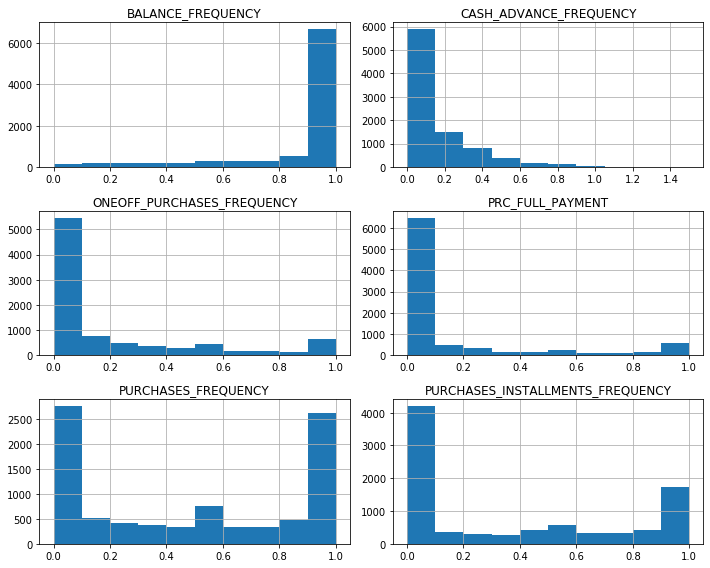

In [22]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

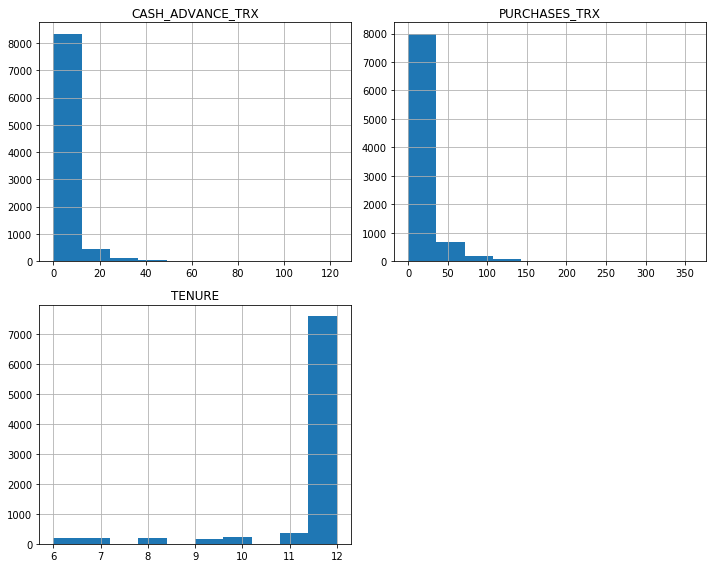

In [23]:
df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

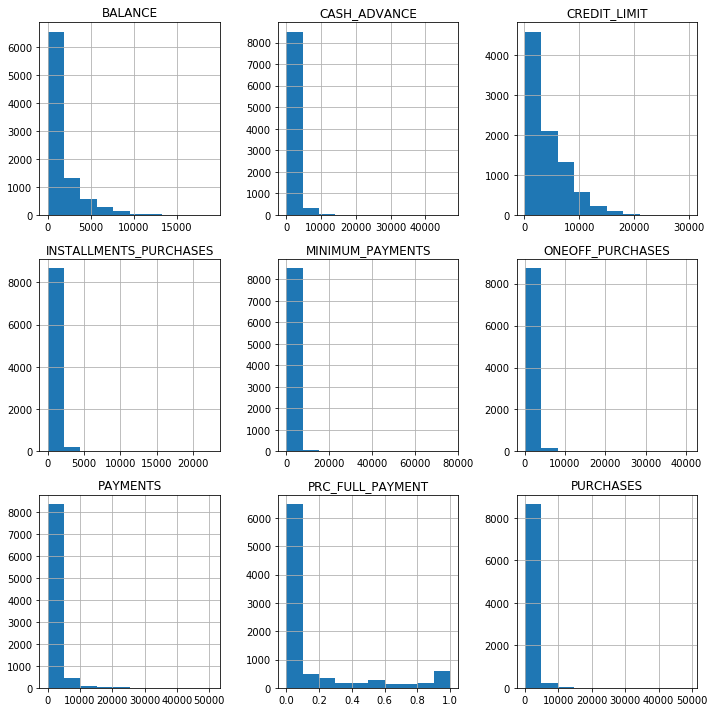

In [24]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

Text(0, 0.5, 'BALANCE')

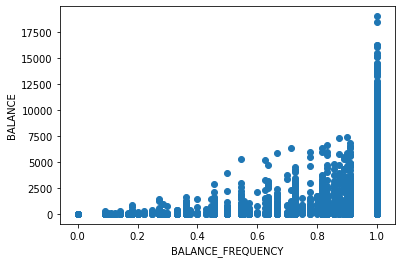

In [25]:
plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

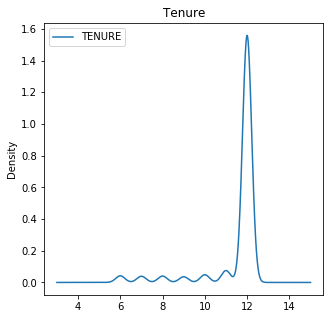

In [26]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')

Text(0.5, 1, 'Correlation Matrix')

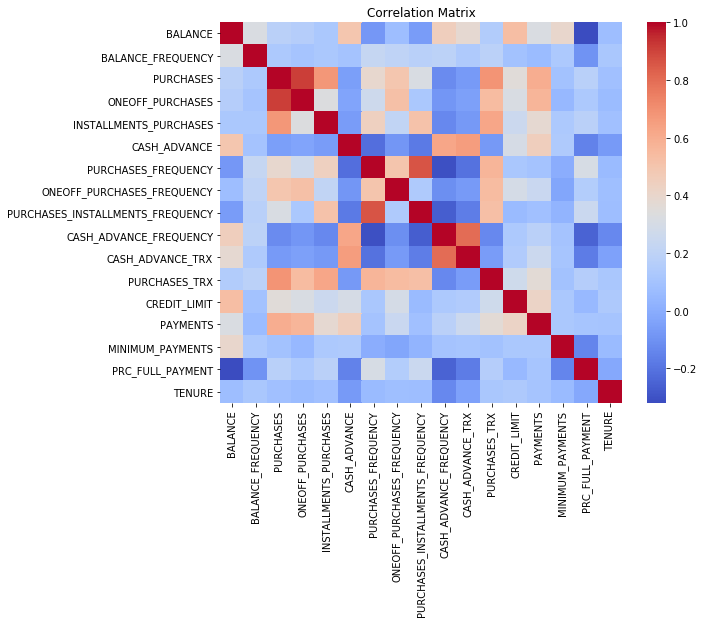

In [27]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

Balance has higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit.
Tenure has negative correlation with Cash Advance and Cash Advance frequency variables

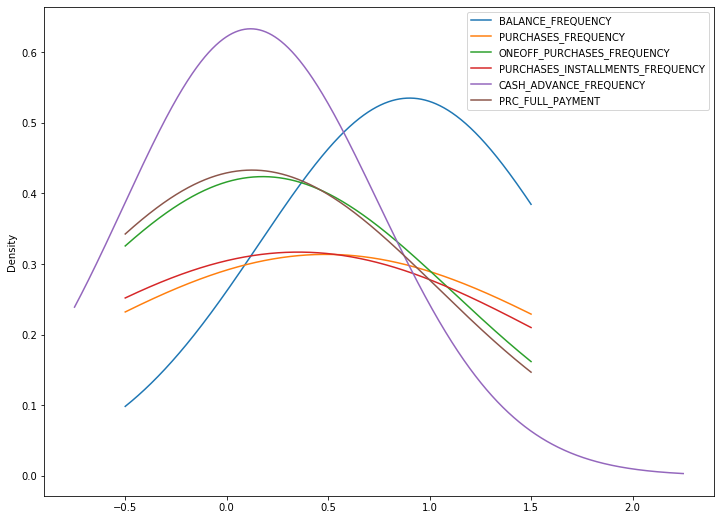

In [28]:
ax = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) #,ind=[0, 2, 3,4]

Outliers

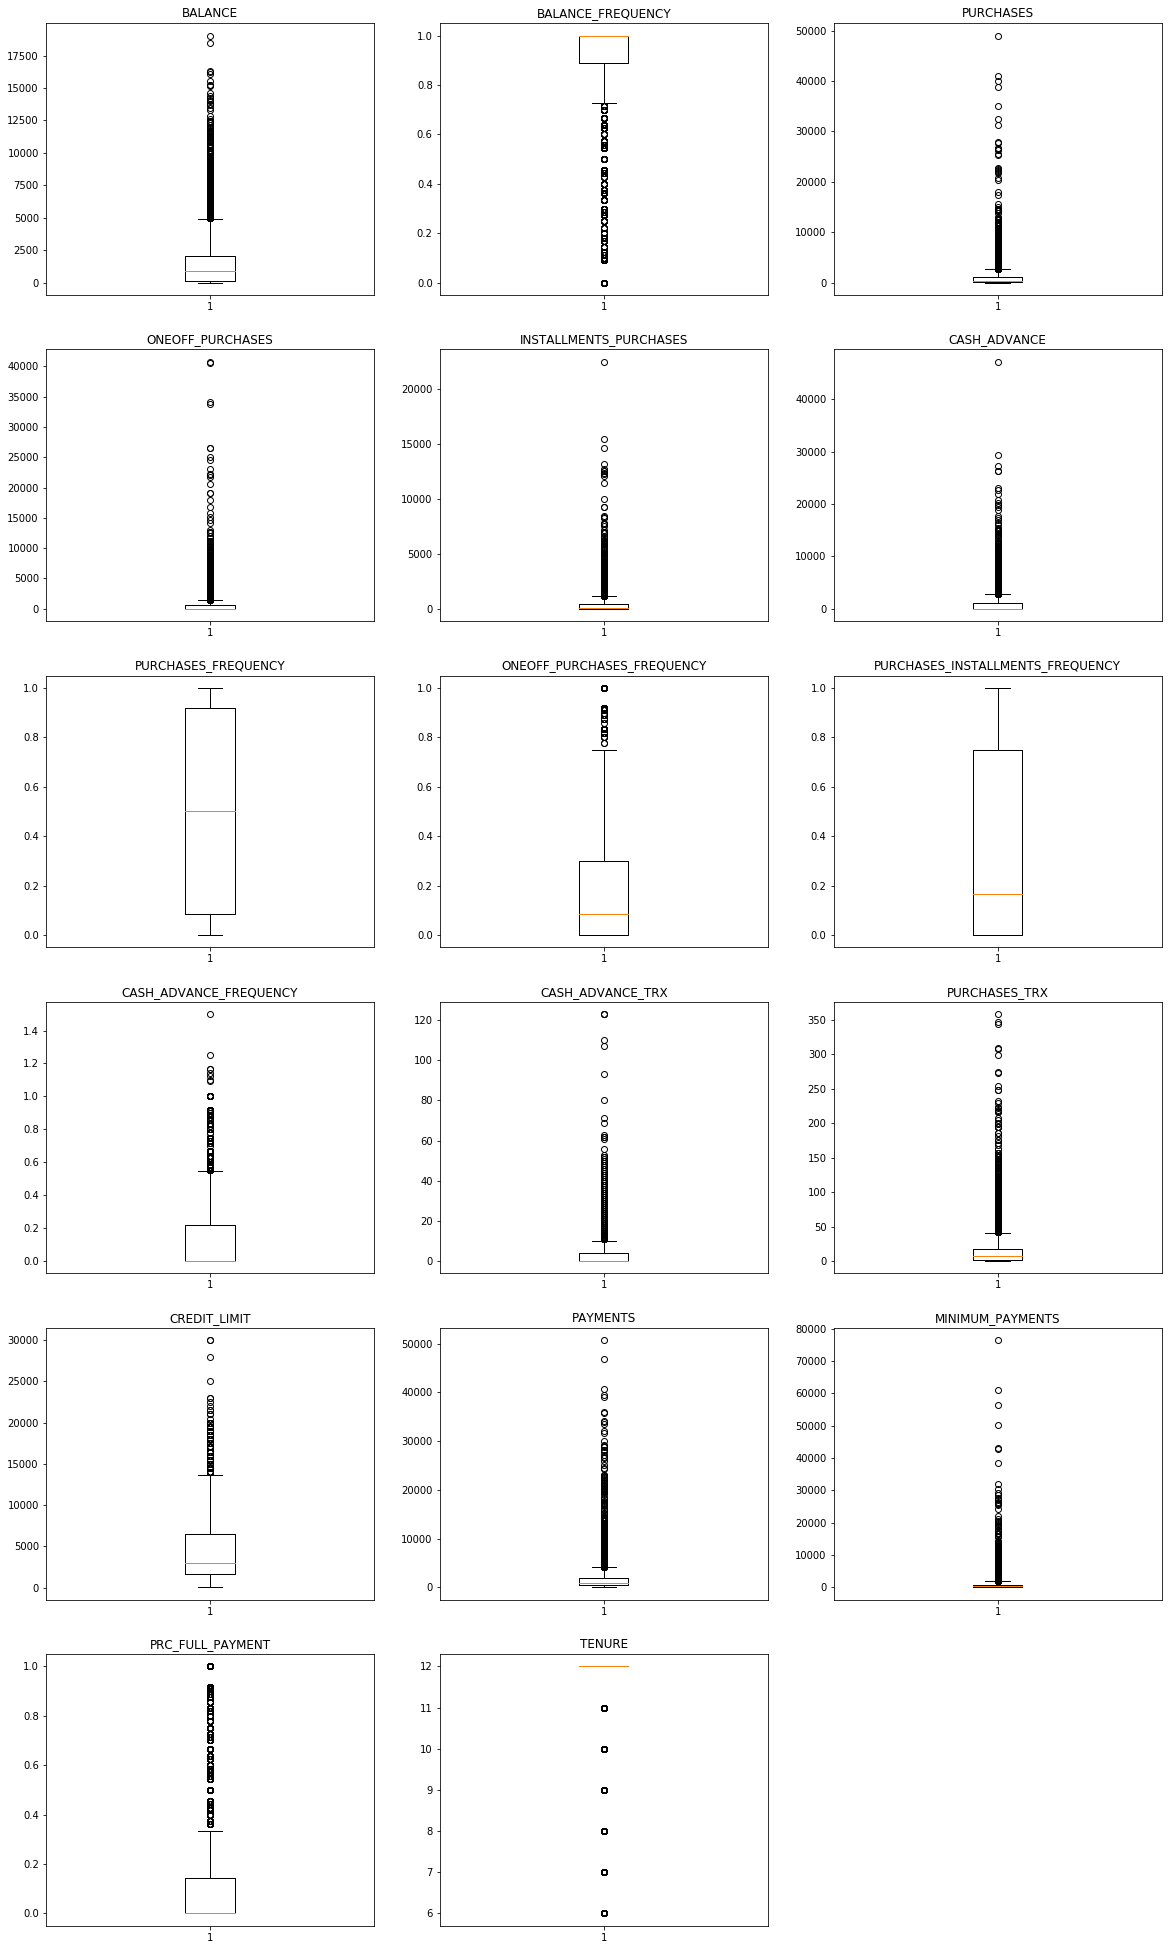

In [29]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

In [30]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

In [31]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 

In [32]:
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 

In [33]:
df.isnull().sum().sort_values(ascending=False).head()

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
PURCHASES                     0
ONEOFF_PURCHASES              0
dtype: int64

In [34]:
df.columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Clustering

In [35]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

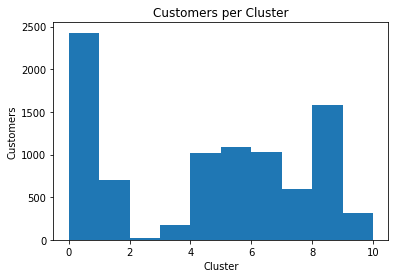

In [36]:
# Custumers per cluster

n_clusters = 10

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

Now we will determine number of clusters by elbow method

In [37]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

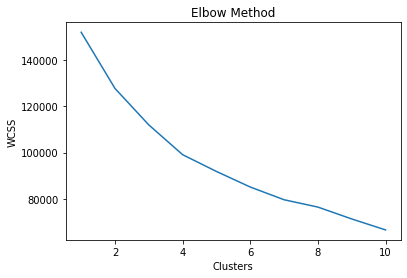

In [38]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Determine number of clusters with Silhouette Scores Method

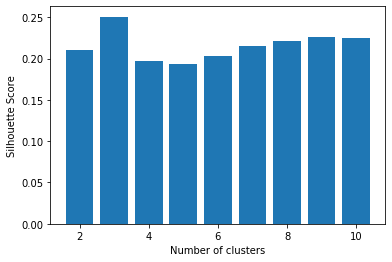

In [39]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Kmeans



Kmeans with different number of clusters from 1 to 20

In [40]:
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.210
Silhouette score for 3 cluster k-means: 0.251
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.190
Silhouette score for 6 cluster k-means: 0.196
Silhouette score for 7 cluster k-means: 0.214
Silhouette score for 8 cluster k-means: 0.201
Silhouette score for 9 cluster k-means: 0.215
Silhouette score for 10 cluster k-means: 0.220
Silhouette score for 11 cluster k-means: 0.216
Silhouette score for 12 cluster k-means: 0.216
Silhouette score for 13 cluster k-means: 0.219
Silhouette score for 14 cluster k-means: 0.220
Silhouette score for 15 cluster k-means: 0.203
Silhouette score for 16 cluster k-means: 0.205
Silhouette score for 17 cluster k-means: 0.206
Silhouette score for 18 cluster k-means: 0.207
Silhouette score for 19 cluster k-means: 0.208


In [41]:
kmeans8 = df_std.copy() 

In [42]:
kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(kmeans8) #without 'predict' we do not labels yet.

Spectral Clustering

In [43]:
# Normalizing the Data 
df_nor = normalize(df_std) 

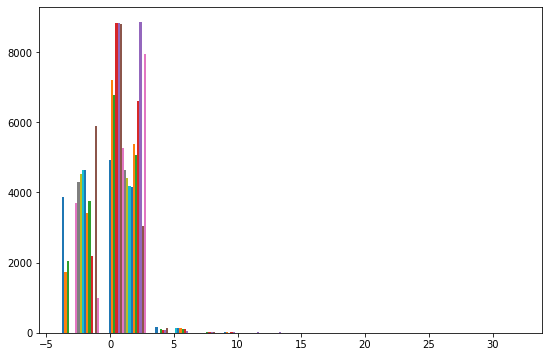

In [44]:
plt.figure(figsize=(9,6))
plt.hist(df_std)
plt.show()

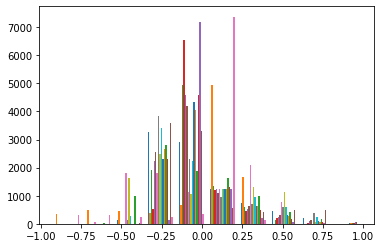

In [45]:
plt.hist(df_nor)
plt.show()

Checking Spectral Values in Different 'n_neighbours' and 'Clusters'

In [46]:
silhouette_list_spectral= []

for cluster in range(2,10):
    for neighbours in np.arange (3,10,2):
        spectral = SpectralClustering(n_clusters=cluster, affinity="nearest_neighbors",n_neighbors=neighbours, assign_labels='discretize',
                                      random_state=40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std,spectral, metric='euclidean')
        silhouette_list_spectral.append((cluster,sil_score, neighbours))

    
df_spectral= pd.DataFrame(silhouette_list_spectral, columns=['cluster', 'sil_score', 'neighbours'] )

The above process will take its time to execute

Now we will compare results for the Optimal Number of Cluster Model

In [50]:
kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(df_std)

In [51]:
spectral_    = SpectralClustering(n_clusters=7, affinity="rbf", n_neighbors=5, assign_labels='discretize',
                                  random_state=40).fit_predict(df_nor)

In [52]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
Spectral_Silhouette_Score     = metrics.silhouette_score(df_std, spectral_, metric='euclidean')

In [53]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Spectral', Spectral_Silhouette_Score]]
Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score
0            KMeans          0.200606
1          Spectral          0.138689

We will continue with Kmeans method

Understanding Clusters by Customer Segmentation

Kmeans Model with 8 Clusters

In [65]:
kmeans_       = KMeans(n_clusters=8, random_state=40).fit(df_std)
df['cluster'] = kmeans_.labels_

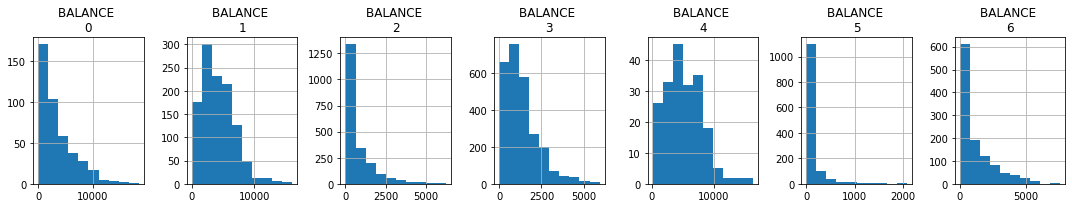

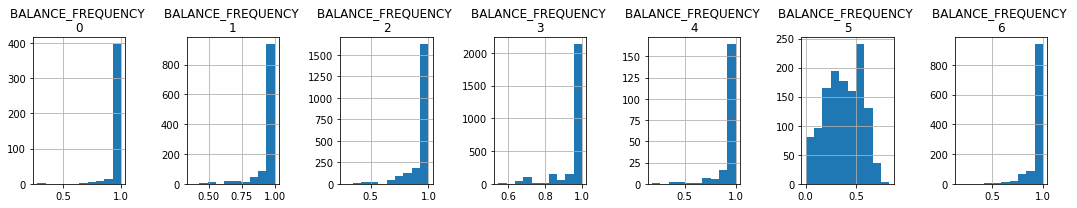

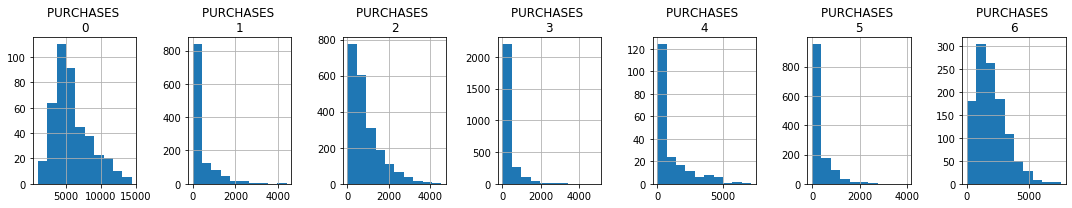

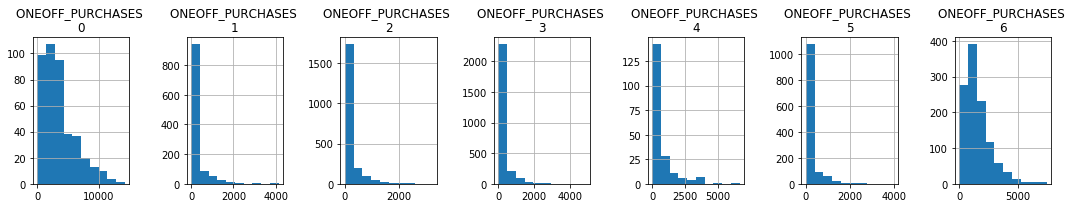

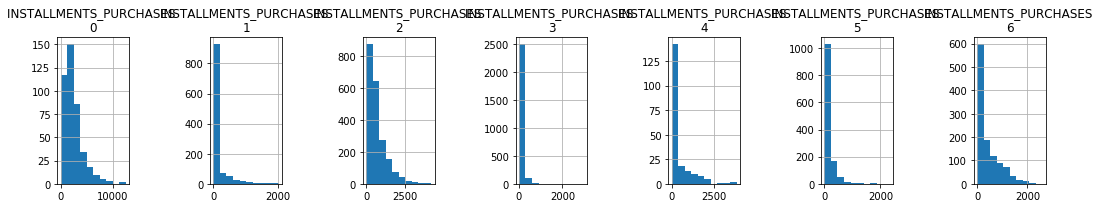

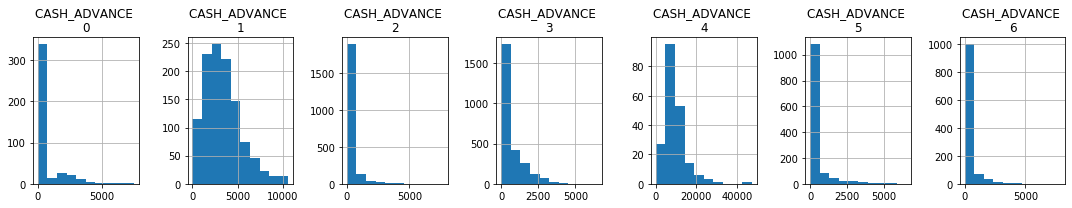

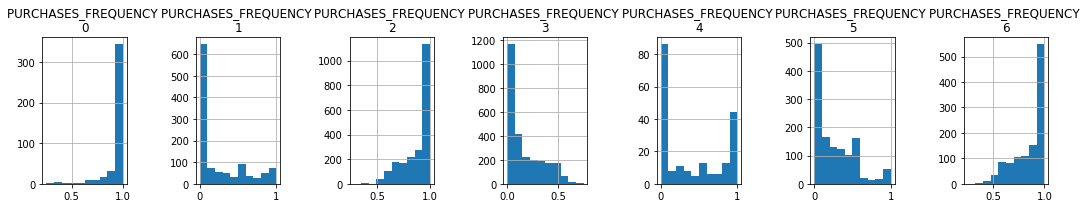

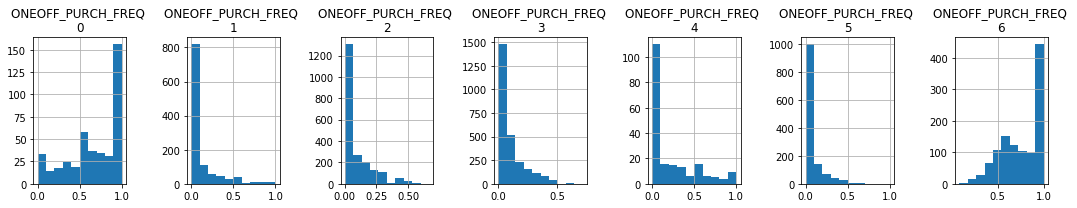

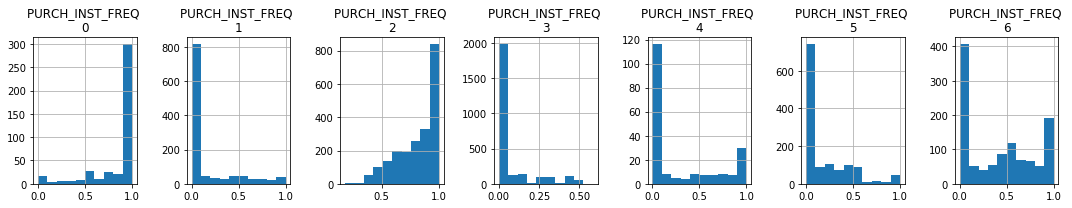

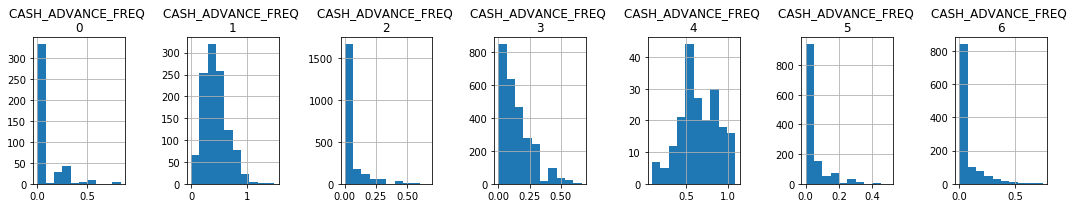

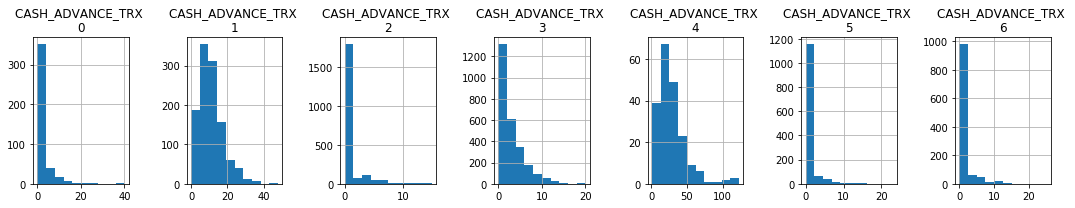

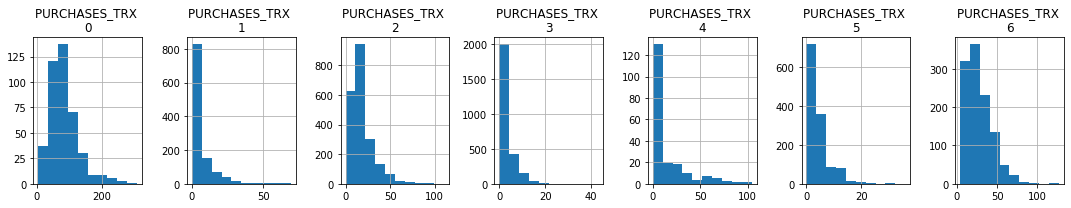

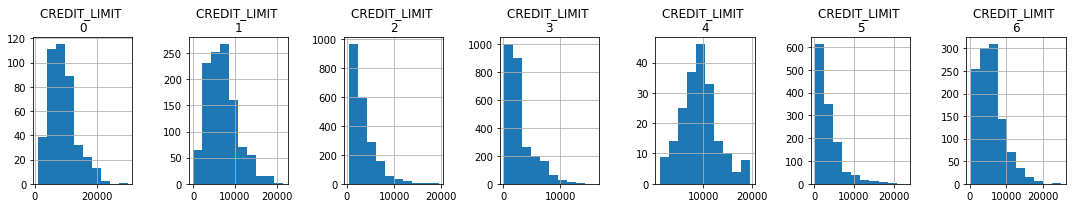

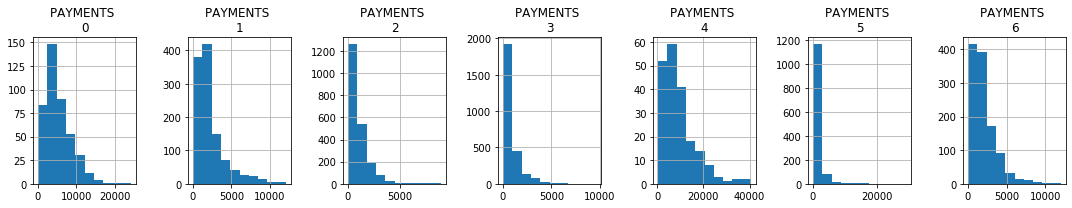

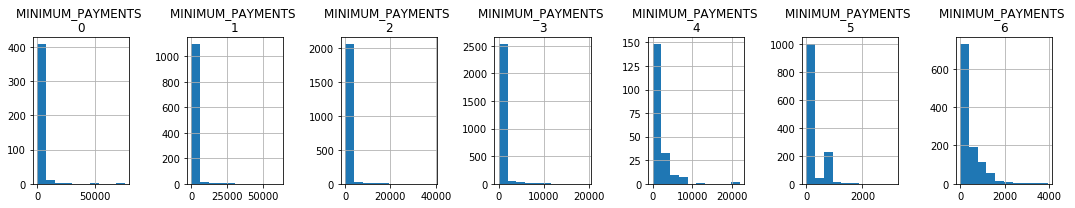

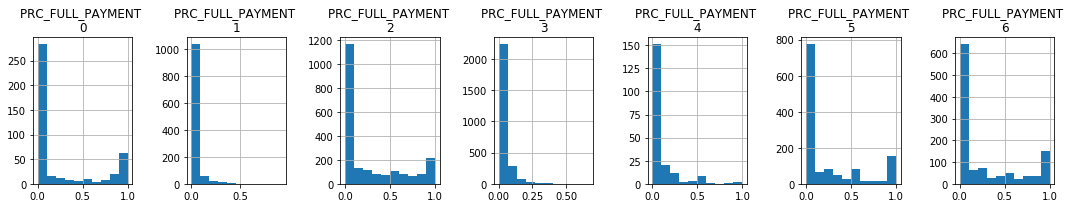

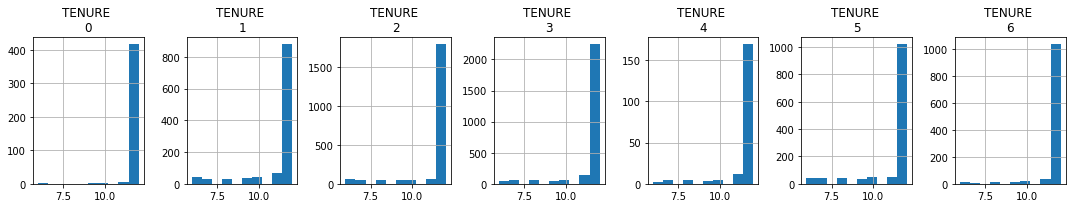

In [66]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,7):
        plt.subplot(1,7,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [67]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

Text(0, 0.5, 'PAYMENTS')

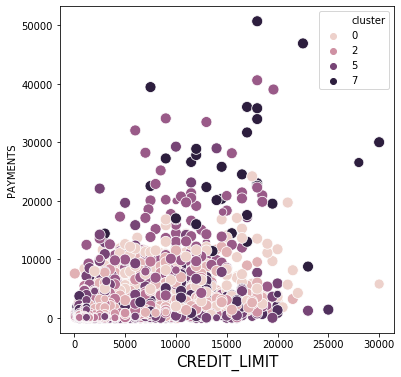

In [68]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='CREDIT_LIMIT', y='PAYMENTS', hue='cluster',data=df, s = df.TENURE*10);
plt.xlabel('CREDIT_LIMIT',size=15)
#plt.xlim([0,40000])
plt.ylabel('PAYMENTS', size =10)

<Figure size 1800x1800 with 0 Axes>

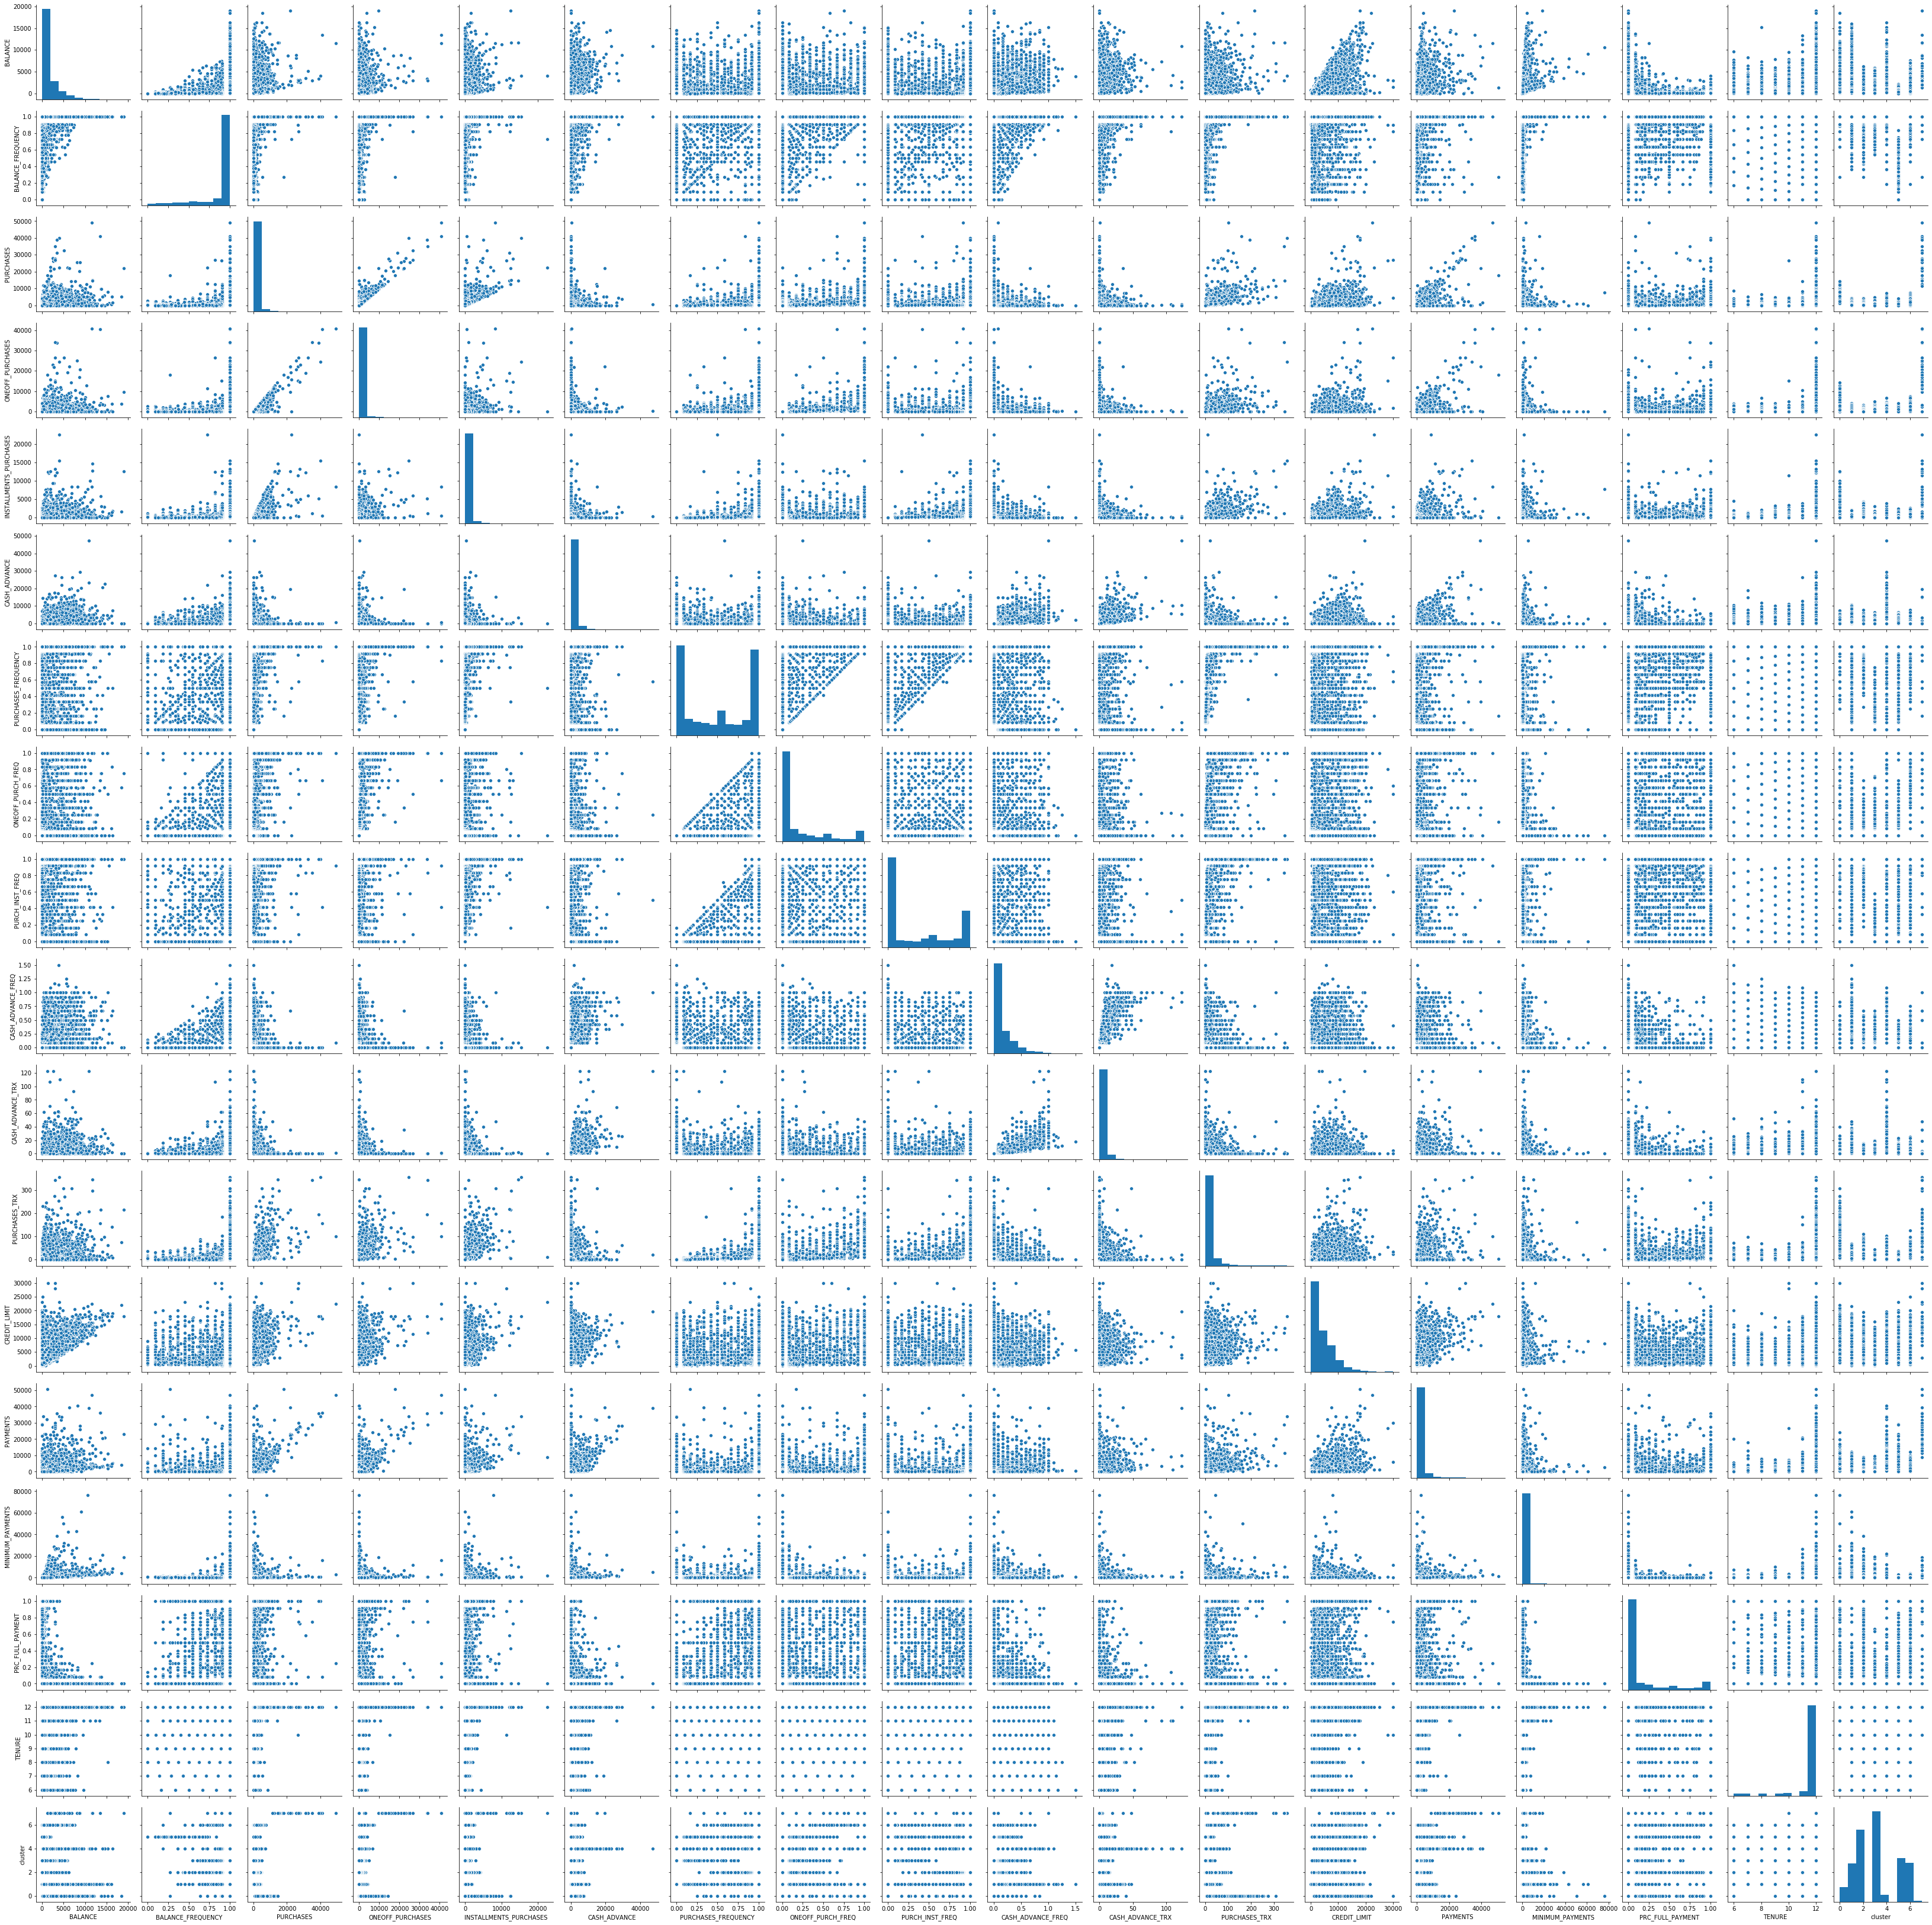

In [79]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))

try:
    sns.pairplot(df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pairplot( df[best_columns], hue="cluster",bw=1.5)
    else:
        raise re

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


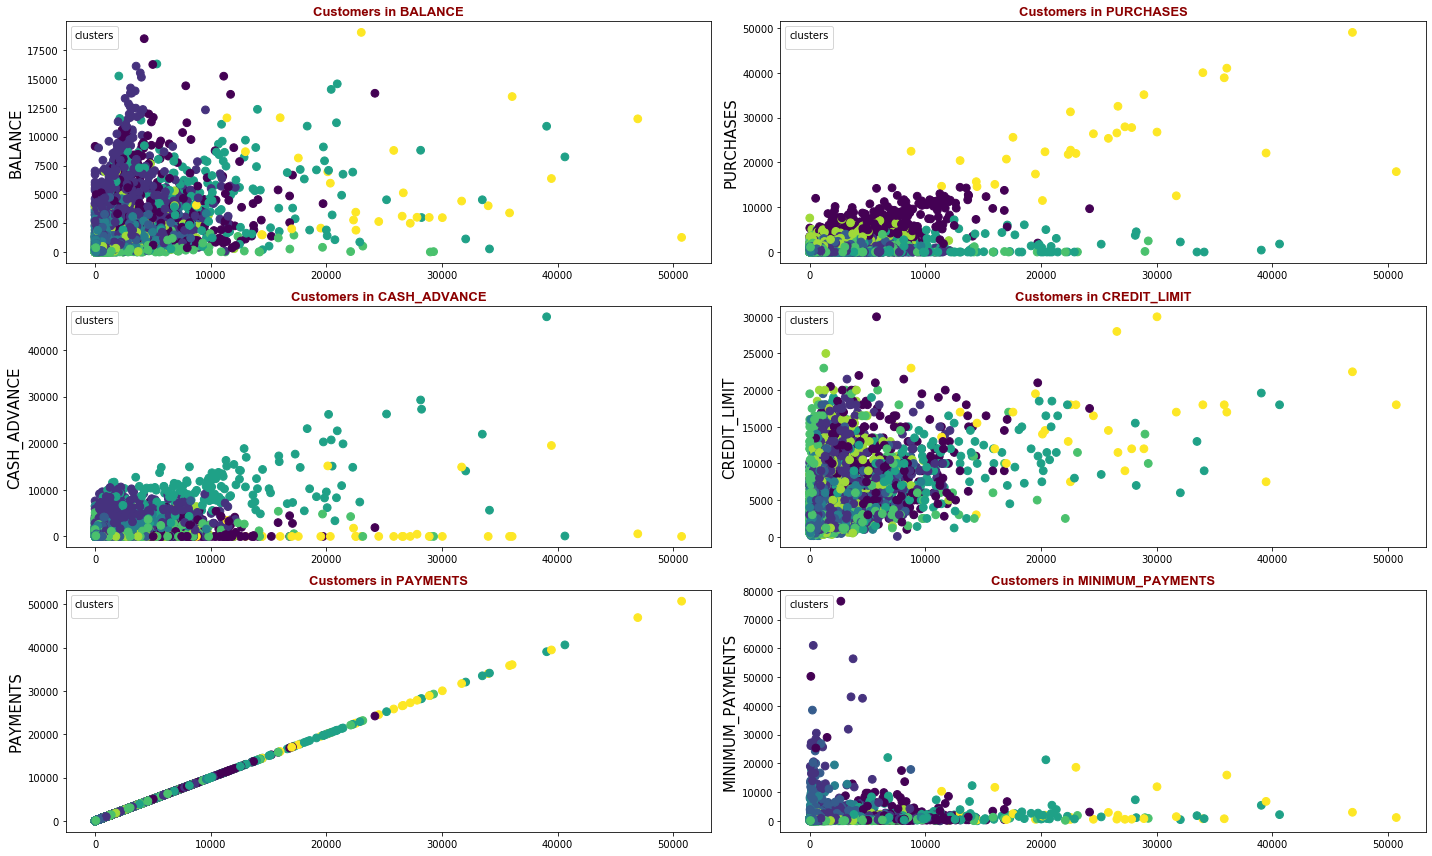

In [80]:
fig, axes = plt.subplots(3,2,figsize=(20,12))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(df['PAYMENTS'], df[best_columns[i]], c= df['cluster'], s=60)
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    #plt.xlabel('customer_behaviours',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()

We aim here  to understand the customer behaviours based on credit card users.

Large Payments are done by a small group with expensive purchases and a credit limit that is between average and high.

Small group of people have a higher amount of Cash Advance* especially after payments of 30.000. Large group of people have a lower cash limit contrats large payments.

*Credit Limit is very low on a large group of customers with little purchases.

Kmeans Model with 4 Clusters

In [81]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_

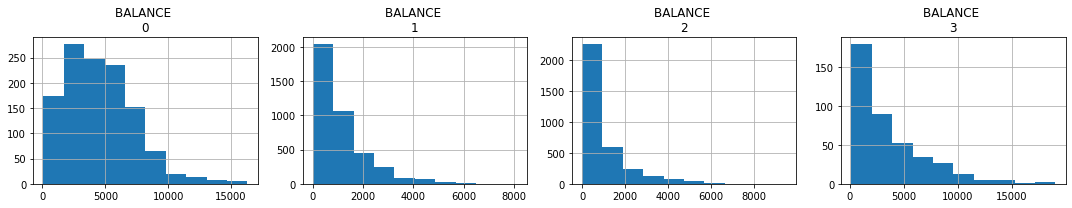

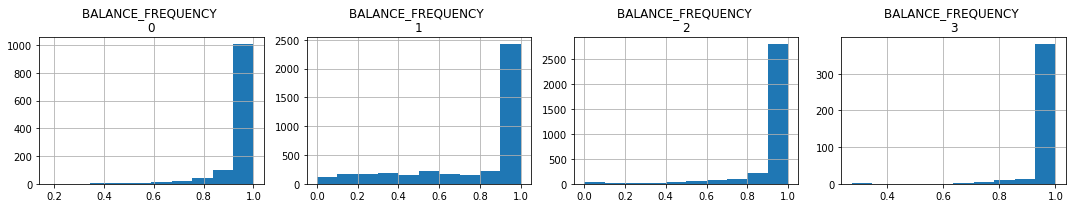

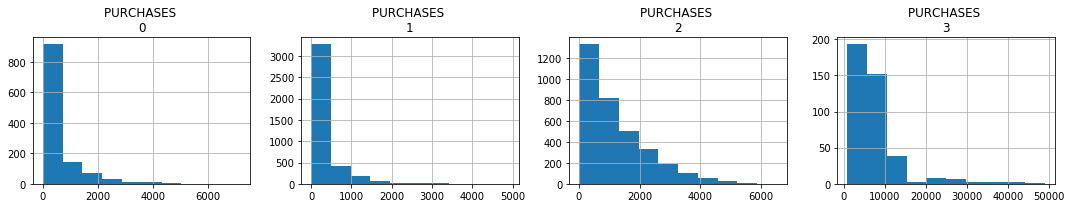

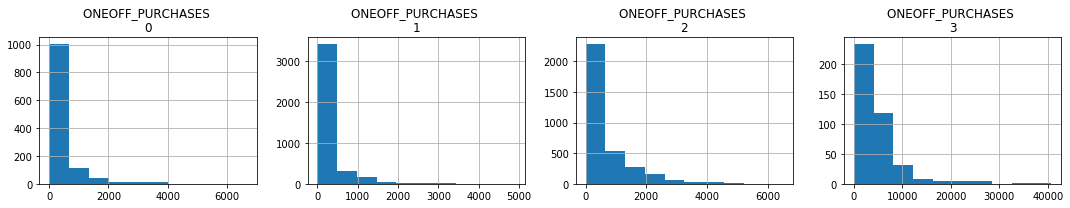

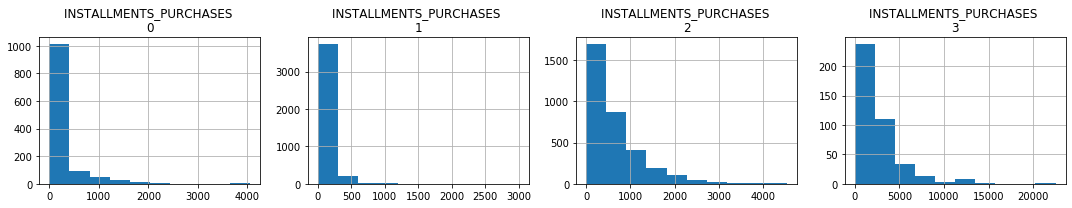

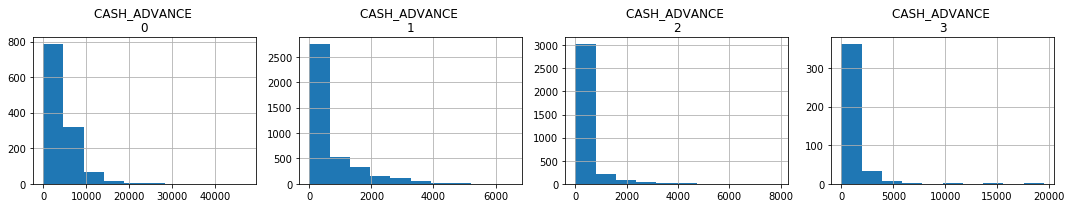

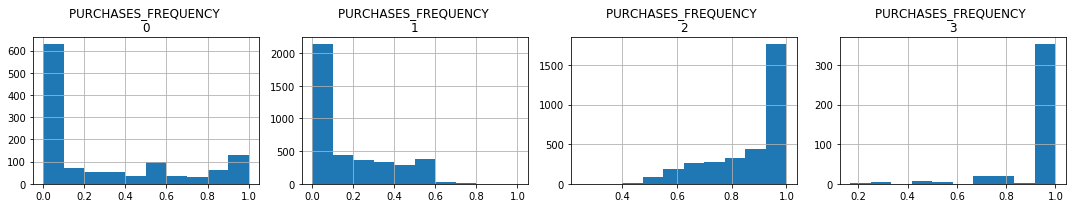

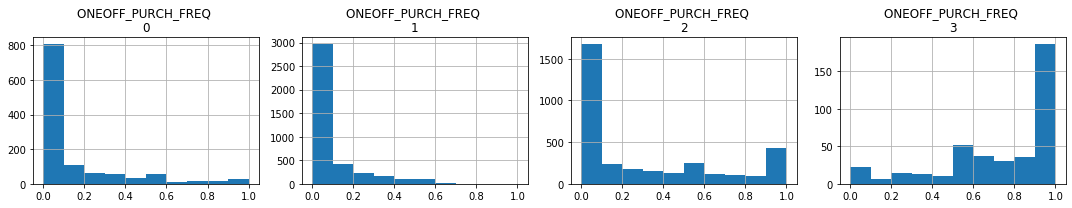

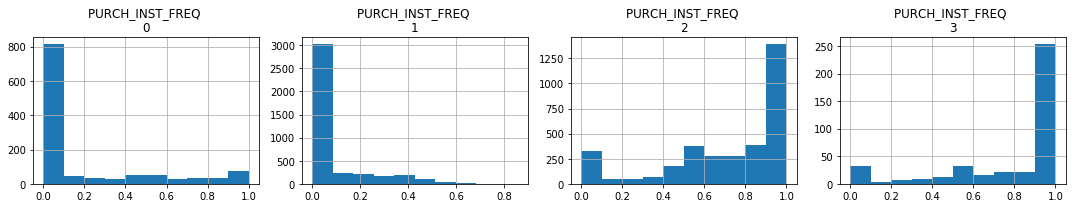

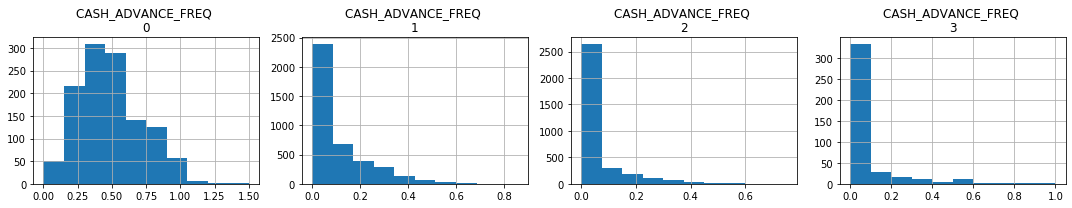

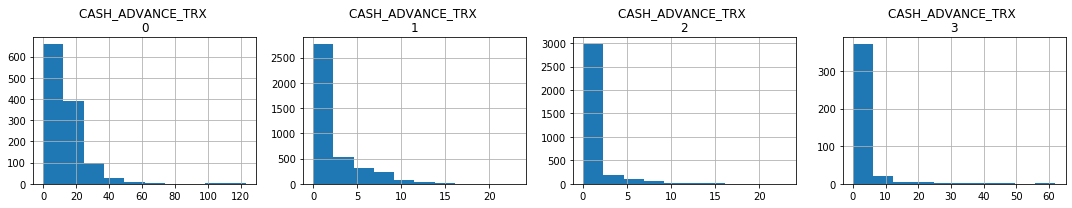

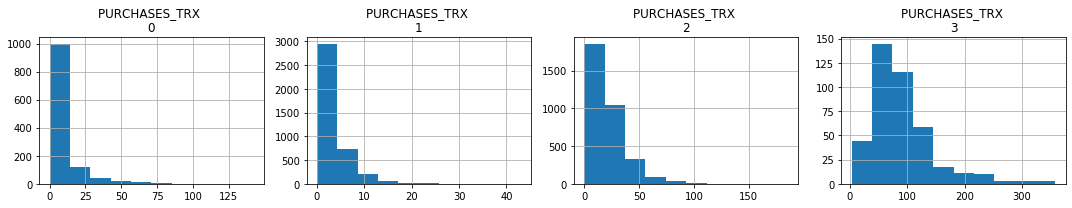

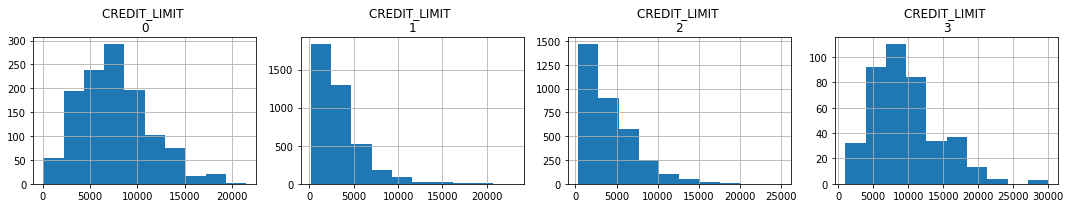

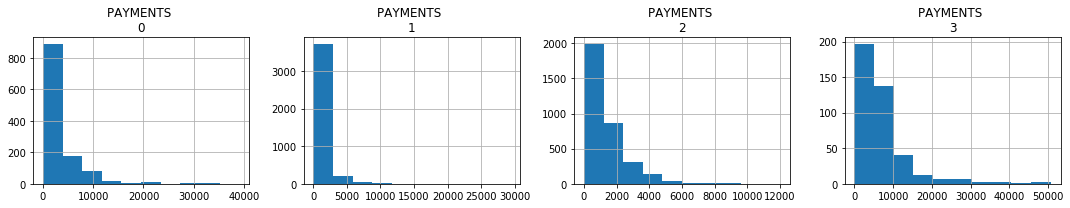

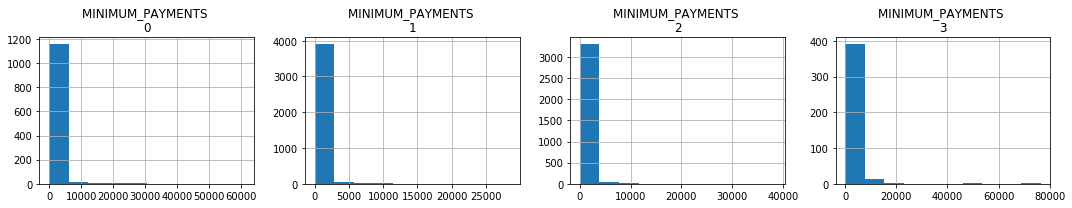

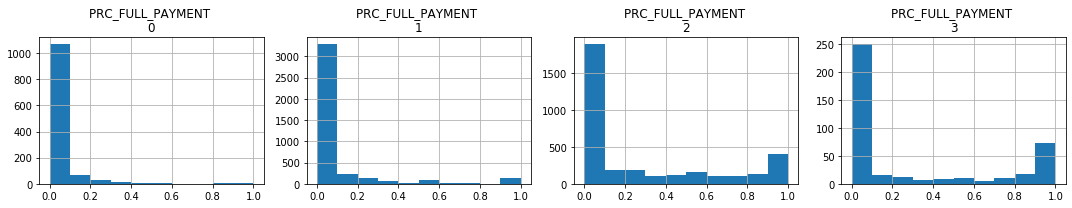

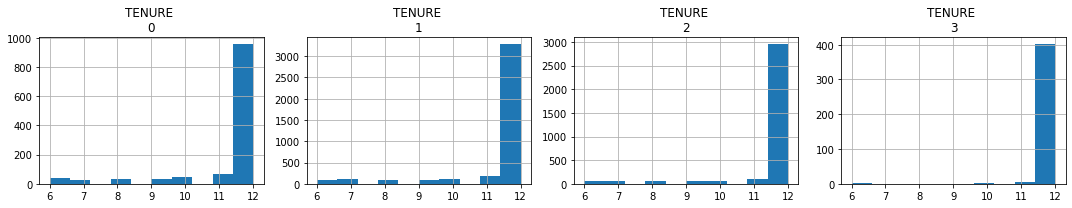

In [82]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

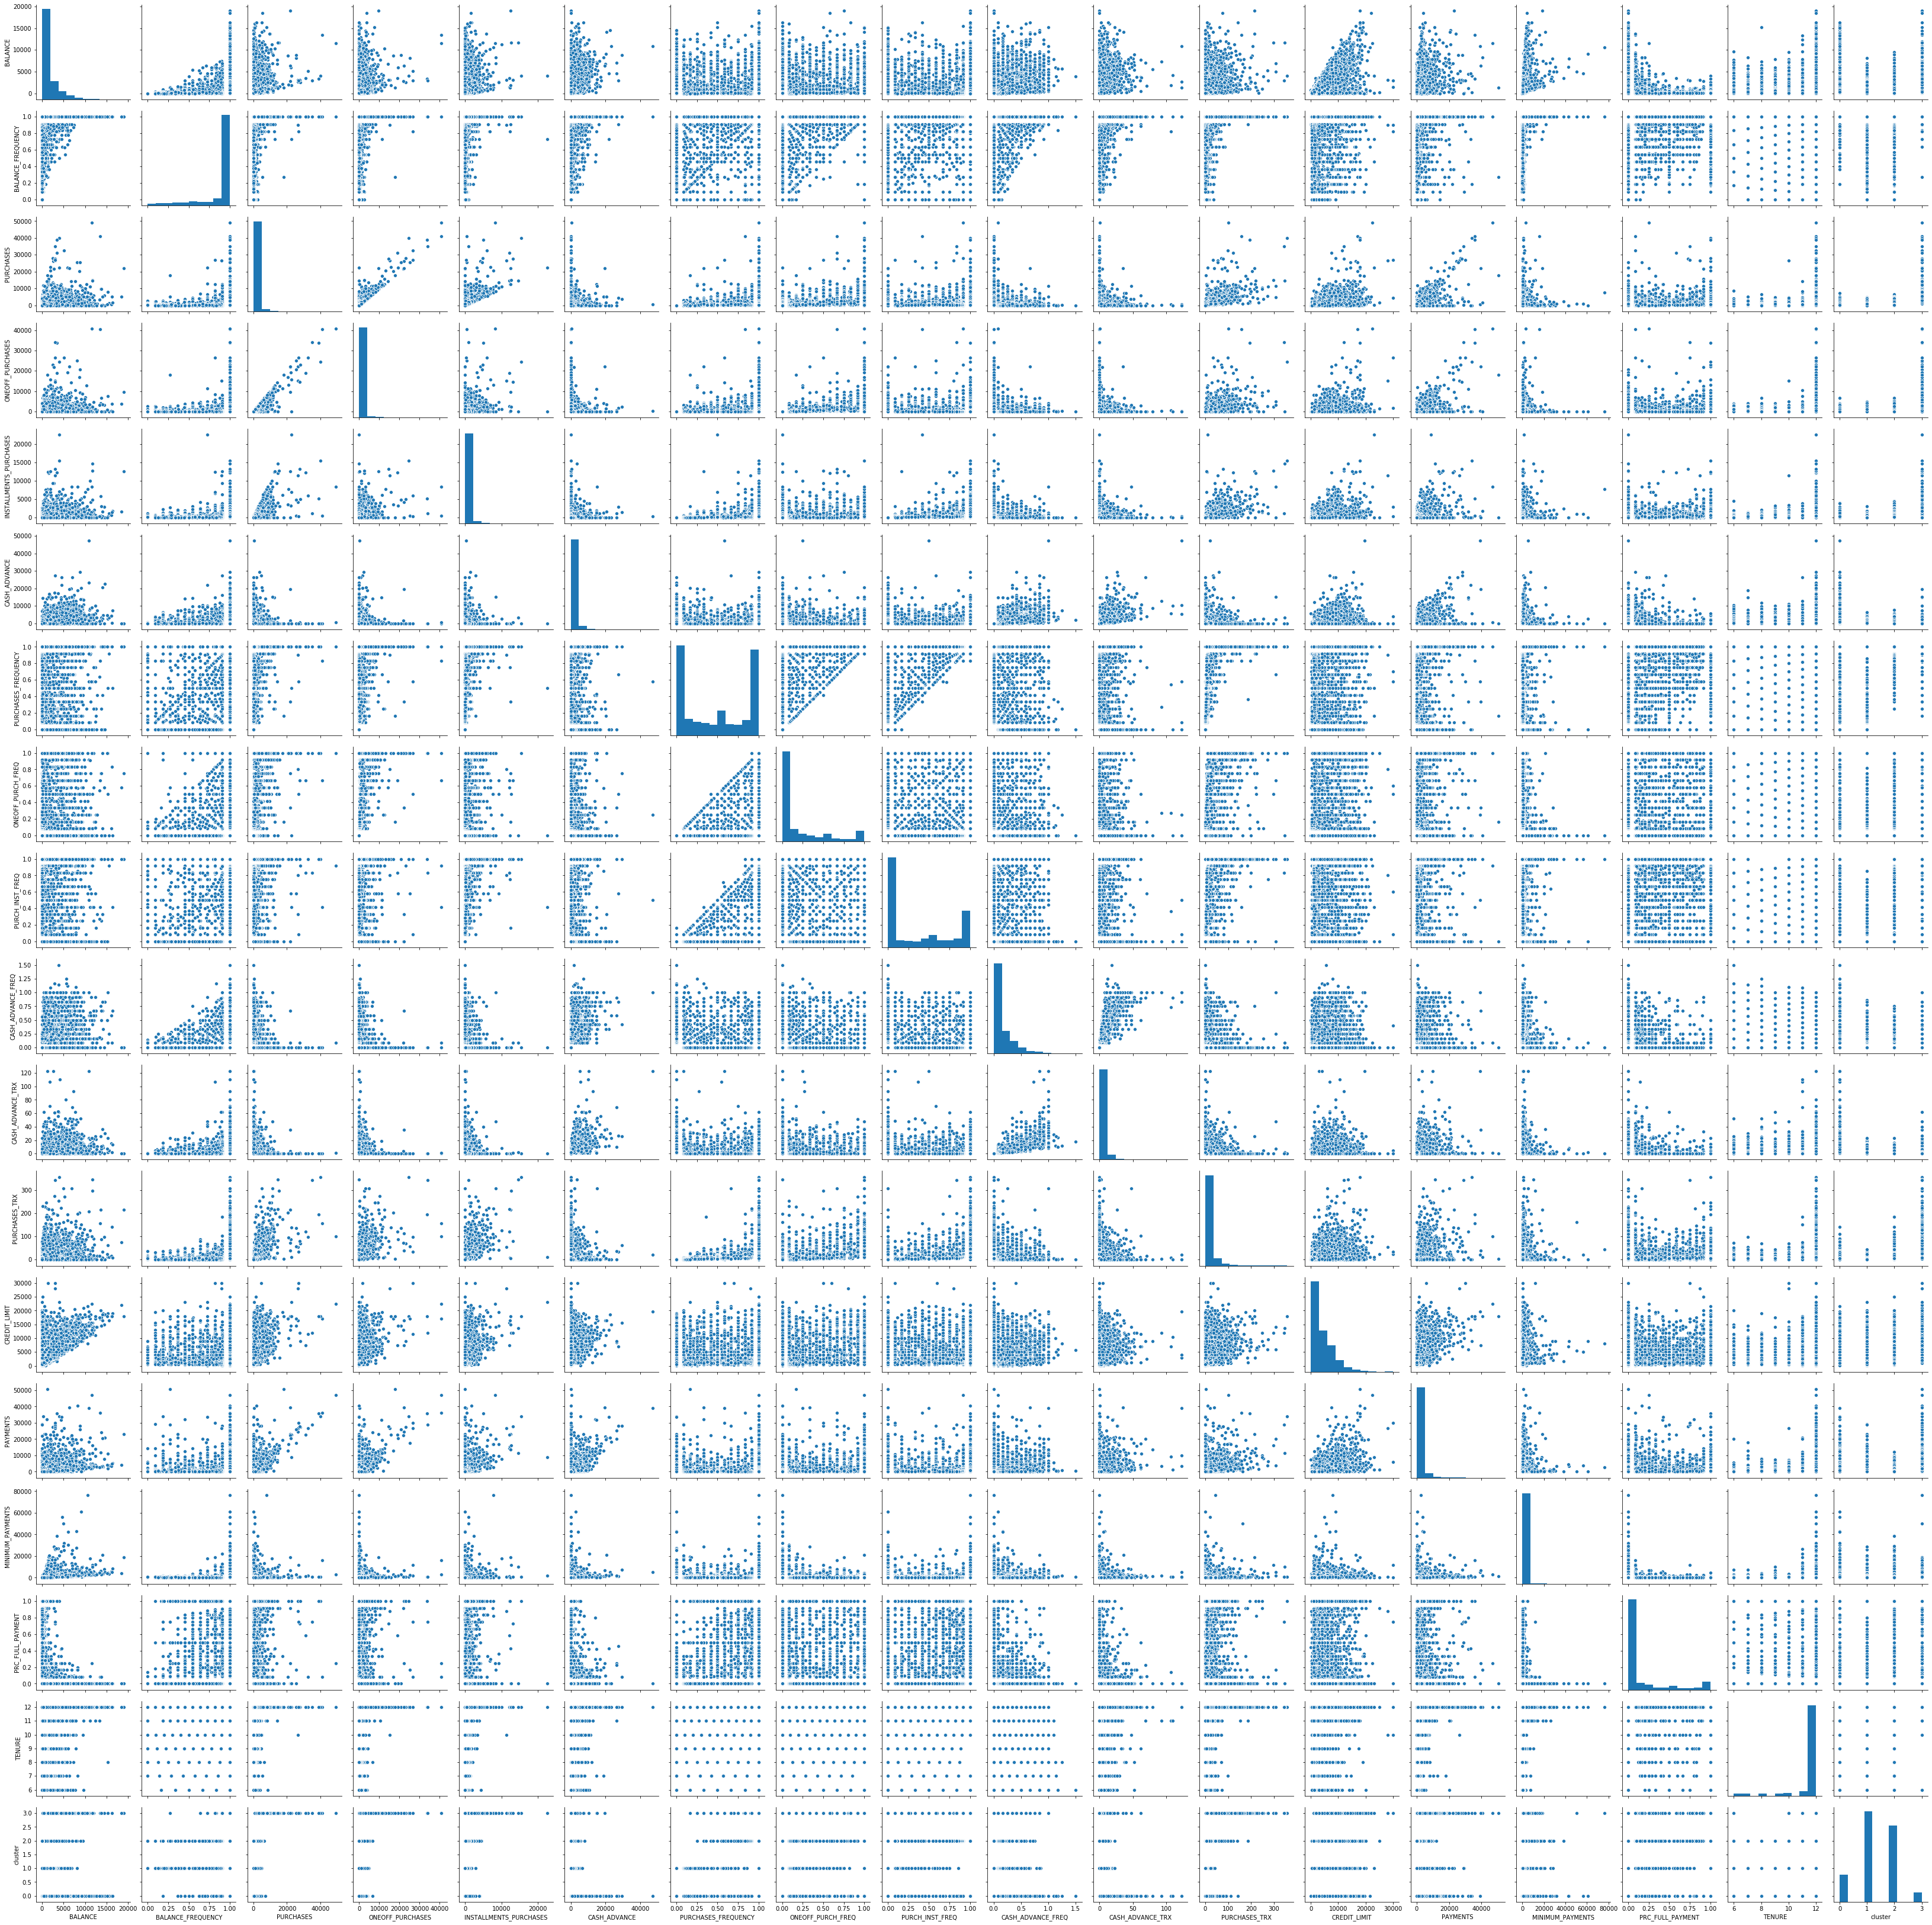

In [84]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
try:
    sns.pairplot(df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pairplot( df[best_columns], hue="cluster")
    else:
        raise re

Observation and Conclusion:

After executing different methods, I chose the Kmeans Model as data does not include different small groups but very similar in each other.I can use this kind of algorithms to research for extreme customers in a credit card fraud. This study aims customer segmentation by using customer behaviors.

Comparing two different Kmeans Models showed that we have a better understanding of customer segmentation by using the 8 clusters model. Some of the outstanding results I have mentioned in the report file.